In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [62]:
#data Exploration

In [63]:
data = pd.read_csv('Rent Prediction Final.csv')
print(data)

    Location  Area in Sqft  NO. of Bed  NO. of Bath     Rent
0     Mirpur          1200           3            2  16000.0
1     Mirpur          1000           3            2  14000.0
2     Mirpur          1350           3            2  17500.0
3     Mirpur          1000           2            1   9000.0
4     Mirpur          1400           3            2  20000.0
..       ...           ...         ...          ...      ...
528   Mirpur          1500           3            2  12500.0
529   Mirpur          1750           3            2  13000.0
530   Mirpur          3200           4            3  38000.0
531   Mirpur          2500           3            3  26500.0
532   Mirpur         26000           4            3  28000.0

[533 rows x 5 columns]


In [64]:
data.head()

,Location,Area in Sqft,NO. of Bed,NO. of Bath,Rent
0,Mirpur,1200,3,2,16000.0
1,Mirpur,1000,3,2,14000.0
2,Mirpur,1350,3,2,17500.0
3,Mirpur,1000,2,1,9000.0
4,Mirpur,1400,3,2,20000.0


In [65]:
data.describe()

,Area in Sqft,NO. of Bed,NO. of Bath,Rent
count,533.000000,533.000000,533.000000,533.000000
mean,1677.699812,2.939962,2.748593,24160.633208
std,1450.900196,0.668967,0.907686,10909.240004
min,300.000000,1.000000,1.000000,17.500000
25%,1300.000000,3.000000,2.000000,16000.000000
50%,1500.000000,3.000000,3.000000,24500.000000
75%,1800.000000,3.000000,3.000000,30000.000000
max,26000.000000,5.000000,5.000000,75000.000000


In [66]:
data.shape

(533, 5)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      533 non-null    object 
 1   Area in Sqft  533 non-null    int64  
 2   NO. of Bed    533 non-null    int64  
 3   NO. of Bath   533 non-null    int64  
 4   Rent          533 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 20.9+ KB


In [68]:
data.dropna(inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      533 non-null    object 
 1   Area in Sqft  533 non-null    int64  
 2   NO. of Bed    533 non-null    int64  
 3   NO. of Bath   533 non-null    int64  
 4   Rent          533 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 20.9+ KB


In [70]:
data.isnull().sum()

Location        0
Area in Sqft    0
NO. of Bed      0
NO. of Bath     0
Rent            0
dtype: int64

array([[<Axes: title={'center': 'Area in Sqft'}>,
        <Axes: title={'center': 'NO. of Bed'}>],
       [<Axes: title={'center': 'NO. of Bath'}>,
        <Axes: title={'center': 'Rent'}>]], dtype=object)

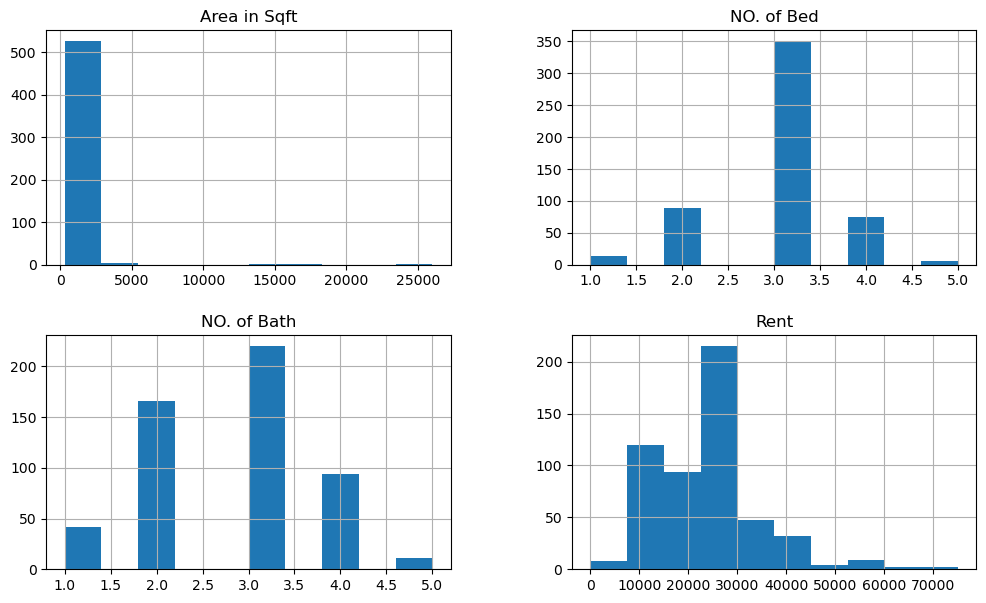

In [71]:
data.hist(figsize=(12, 7))

In [72]:
print("Data types before preprocessing:\n", data.dtypes)

Data types before preprocessing:
 Location         object
Area in Sqft      int64
NO. of Bed        int64
NO. of Bath       int64
Rent            float64
dtype: object


In [73]:
#Preprocessing

In [74]:
data.Location.value_counts()

Location
Bashundhara      253
Mirpur           163
Uttara           117
Name: count, dtype: int64

In [75]:
#Turning categorial data into binary numerical values and use them as indivual features
#correlation analysis

<Axes: >

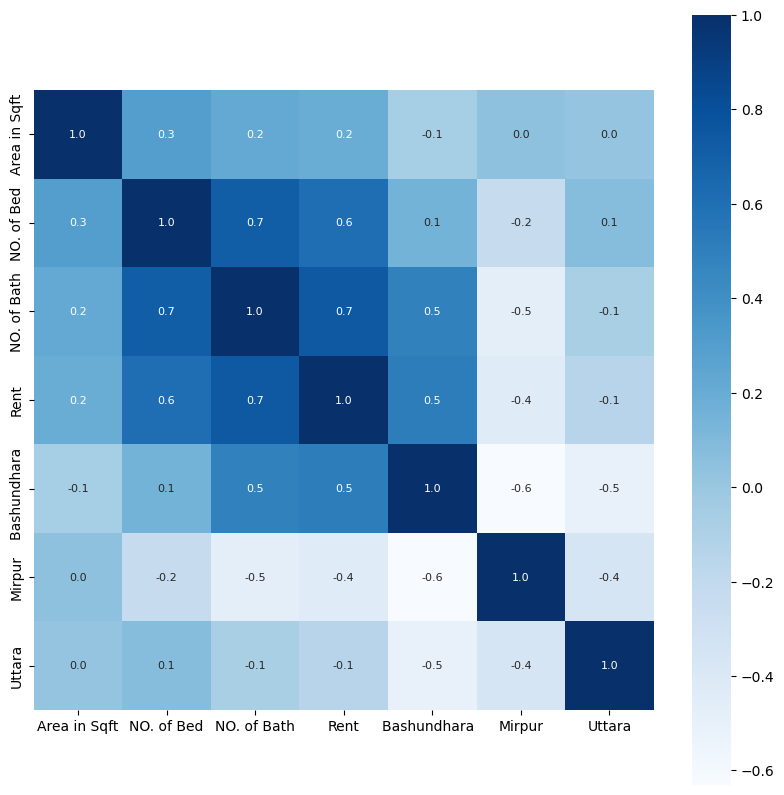

In [76]:
train_data=data.join(pd.get_dummies(data.Location)).drop(['Location'], axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')



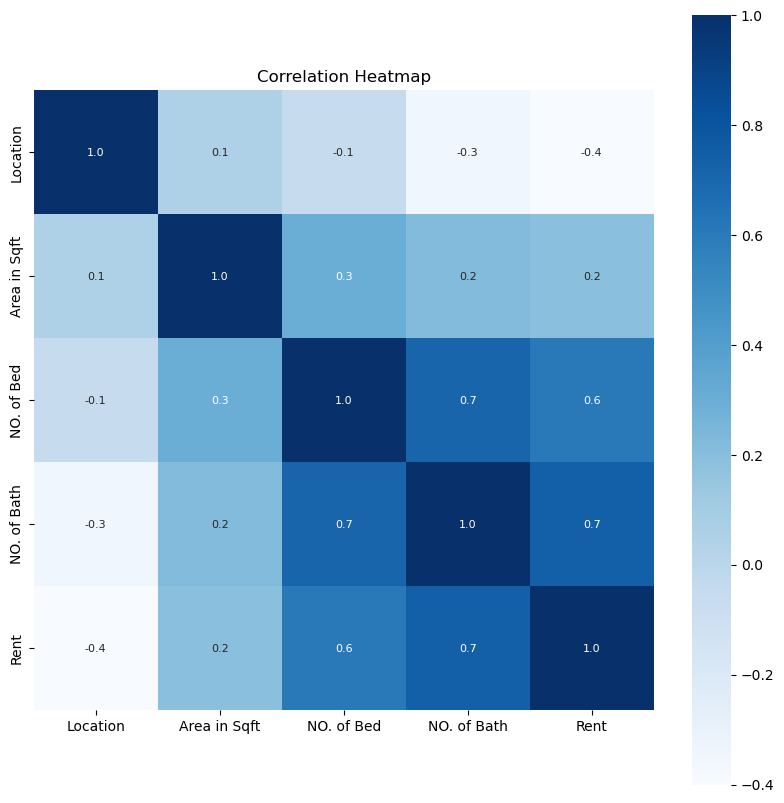

In [77]:
#correlation analysis using label encoding
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()

# List of categorical columns to be label encoded
categorical_columns = data_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

correlation = data_encoded.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [78]:
#scatterplot

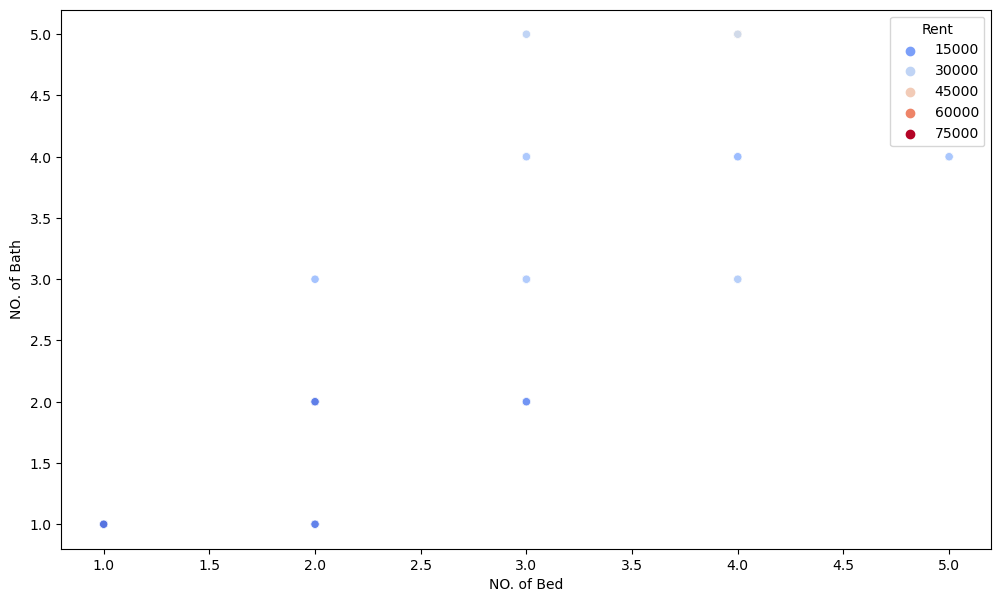

In [79]:
plt.figure(figsize=(12,7))

sns.scatterplot(x="NO. of Bed", y="NO. of Bath", data=train_data, hue="Rent", palette="coolwarm")

plt.show()

In [80]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le
print("Data types before preprocessing:\n", data.dtypes)

Data types before preprocessing:
 Location          int32
Area in Sqft      int64
NO. of Bed        int64
NO. of Bath       int64
Rent            float64
dtype: object


In [81]:
#Spliting the data into input data and target data/output
X= data.drop({"Rent"}, axis=1)
Y= data["Rent"]


In [82]:
print(X)
print(Y)

     Location  Area in Sqft  NO. of Bed  NO. of Bath
0           1          1200           3            2
1           1          1000           3            2
2           1          1350           3            2
3           1          1000           2            1
4           1          1400           3            2
..        ...           ...         ...          ...
528         1          1500           3            2
529         1          1750           3            2
530         1          3200           4            3
531         1          2500           3            3
532         1         26000           4            3

[533 rows x 4 columns]
0      16000.0
1      14000.0
2      17500.0
3       9000.0
4      20000.0
        ...   
528    12500.0
529    13000.0
530    38000.0
531    26500.0
532    28000.0
Name: Rent, Length: 533, dtype: float64


In [83]:
#spliting the data into train and test data

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2,  random_state=2)


In [84]:
print(X.shape, X_train.shape, X_test.shape)

(533, 4) (426, 4) (107, 4)


In [85]:
#Model training using Linear Regression 

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [87]:
model.score(X_test, Y_test)


0.5094315887405491

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mse)


In [89]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared error: {rmse}")


Mean Squared Error: 45769550.300394915
R-squared: 0.5094315887405491
Root Mean Squared error: 6765.319674663934


In [90]:
#Decision Tree Regressor 

In [91]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=2)

tree_reg.fit(X_train, Y_train)
Y_pred = tree_reg.predict(X_test)


In [92]:
tree_reg.score(X_test, Y_test)


0.46541584912956735

In [93]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 49876175.51697137
Root Mean Squared Error (RMSE): 7062.3066711217925
R-squared: 0.46541584912956735


In [94]:
#Random Forest 

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=2)
rf_reg.fit(X_train, Y_train)
Y_pred = rf_reg.predict(X_test)


In [96]:
rf_reg.score(X_train, Y_train)

0.891218713547529

In [97]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 42847443.963216744
Root Mean Squared Error (RMSE): 6545.795899905278
R-squared: 0.5407513865963802


In [98]:
#Xgboost

In [99]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)
xgb_reg.fit(X_train, Y_train)  
Y_pred = xgb_reg.predict(X_test)


In [100]:
xgb_reg.score(X_train, Y_train)

0.8413659603772121

In [101]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 38591849.90335007
Root Mean Squared Error (RMSE): 6212.233889942496
R-squared: 0.5863638080253044
